In [1]:
import pandas as pd
from collections import Counter

In [2]:
import os
import random
import numpy as np
import pickle
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
def normalizeTargets(i,file):
    ratefile =  os.path.join(file,file+"_rate.npy")
    
    nTargets_1 =np.load(ratefile)
    
    ratefile_train =  os.path.join('train','train'+"_rate.npy")
    #ratefile_train =  os.path.join(file,file+"_rate.npy")
    
    nTa =np.load(ratefile_train)
    

    
    mean = np.mean(nTa,axis=0)
    std = np.std(nTa,axis=0)
    
    norm = 'zscore'

    if(norm == 'zscore'):
        nTargets =nTargets_1- mean
        nTargets = np.divide(nTargets,std,out=np.zeros_like(nTargets),where=std!=0)
        
    else:
        nTargets = -np.log(nTargets_1)

    return nTargets[i]

In [37]:
def de_normalizeTargets(error,file='train'):
    ratefile =  os.path.join(file,file+"_rate.npy")

    nTargets_1 =np.load(ratefile)

    ratefile_train =  os.path.join('train','train'+"_rate.npy")
    
    #ratefile_train =  os.path.join(file,file+"_rate.npy")
    
    nTa =np.load(ratefile_train)
    

    
    mean = np.mean(nTa,axis=0)
    std = np.std(nTa,axis=0)


    erro = np.dot(error,std)+mean

    '''
    erro = np.exp(-error)
    '''
    return erro

In [38]:
def SNP_WINDOW(w,r,i,file):
 
    respectiveNormalizedTargets = [normalizeTargets(i,file)]
    targets = np.array(respectiveNormalizedTargets)
    lis=[]

    for i in w:
        co = dict(Counter(i))
        if len(co.keys())==2:
            lis.append(co[min(co,key=co.get)]/len(i))
    bins = np.linspace(0, 1, 20)

    bin_means,bins = np.histogram(lis, bins, normed=True, density=True)
    bins= bins[1:]
    bin_means= bin_means/bin_means.sum()
    

    
    

    return np.array(bins),np.array(targets),bin_means

In [39]:
def break_window(ha,po,ra,winsize):
    print(len(ha))
    bins = np.linspace(0, len(ha),winsize)

    bin_means,bins = np.histogram(ha, bins)
    print(bin_means)

In [40]:
def __data_generation1(batchTreeIndices,file):

        haps = []
        pos = []
        rate =[]
        for treeIndex in batchTreeIndices:
            Hfilepath = os.path.join(file,str(treeIndex) + "_haps.npy")
            Pfilepath = os.path.join(file, str(treeIndex) +"_pos.npy")
            H = np.load(Hfilepath)
            P = np.load(Pfilepath)

            haps.append(H)
            pos.append(P)

        return haps,pos


            
def __getitem__1(idx,val):
    X,x1= __data_generation1([idx],val)
    return X,x1

In [77]:
lis_train=[]
train_=[]
for i in range(1000):
    x,pos= __getitem__1(i,'train')
    
    if len(pos[0])>0:
        vale2,targets,vale1 = SNP_WINDOW(x[0],pos[0],i,'train')

        #lis_train.append(vale1)
        lis_train.append(len(pos[0]))
        train_.append(targets[0])



/tmp/ipykernel_25642/3638402278.py:13: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
  bin_means,bins = np.histogram(lis, bins, normed=True, density=True)


In [79]:
lis_test=[]
test_=[]
for i in range(50):
    x,pos= __getitem__1(i,'test')
    if len(pos[0])>0:
        vale2,targets,vale1 = SNP_WINDOW(x[0],pos[0],i,'test')
        #lis_test.append(vale1)
        lis_test.append(len(pos[0]))
        test_.append(targets[0])
    


/tmp/ipykernel_25642/3638402278.py:13: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
  bin_means,bins = np.histogram(lis, bins, normed=True, density=True)


In [80]:
vali_x=[]
vali_y=[]
for i in range(500):
    x,pos= __getitem__1(i,'validation')

    if len(pos[0])>0:
        vale2,targets,vale1 = SNP_WINDOW(x[0],pos[0],i,'validation')

        #vali_x.append(vale1)
        vali_x.append(len(pos[0]))
        vali_y.append(targets[0])



/tmp/ipykernel_25642/3638402278.py:13: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
  bin_means,bins = np.histogram(lis, bins, normed=True, density=True)


In [81]:
Haps,Pos = __getitem__1(0,'train')

In [83]:
len(Pos[0])

15

In [84]:
Pos[0]

array([ 12.924748,  26.752815,  89.85222 , 127.48715 , 159.73659 ,
       199.69556 , 216.37996 , 275.4575  , 556.3572  , 603.2406  ,
       655.78546 , 710.2159  , 727.8772  , 783.283   , 900.2309  ],
      dtype=float32)

In [85]:
_,target,feature =SNP_WINDOW(Haps[0],Pos[0],0,'train')

/tmp/ipykernel_25642/3638402278.py:13: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
  bin_means,bins = np.histogram(lis, bins, normed=True, density=True)


In [86]:
target

array([1.23260141])

In [271]:
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE
xgb_r = xg.XGBRegressor(
    #objective = 'reg:linear',
    
    objective = 'reg:squarederror',
    colsample_bytree = 0.5,
    learning_rate = 0.05,
    max_depth = 6,
    min_child_weight = 1,
    n_estimators = 1000,
    subsample = 0.7
)

In [272]:
#xgb_r = xg.XGBRegressor(objective ='reg:linear',n_estimators = 2500, seed = 123)

In [273]:
#fd= pd.DataFrame(np.stack(lis_train,axis=1)).T
fd= pd.DataFrame(lis_train)

In [274]:
fd

,0
0,15
1,11
2,11
3,10
4,10
...,...
995,13
996,10
997,6
998,6


In [275]:
target =pd.DataFrame(train_,columns=['target'])

In [276]:
target

,target
0,1.232601
1,-0.236719
2,-1.329088
3,-0.783953
4,-1.449027
...,...
995,1.654261
996,-0.745232
997,1.439610
998,1.747836


In [277]:
xgb_r.fit(fd,target)
#pred = xgb_r.predict(np.vstack(feature))



[14:29:20] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, objective='reg:linear',
             predictor='auto', random_state=0, reg_alpha=0, ...)

In [261]:
#pred = xgb_r.predict(pd.DataFrame(np.stack(lis_test,axis=1)).T)

pred = xgb_r.predict(pd.DataFrame(vali_x))

In [262]:
pred

array([ 0.33088937, -0.6220189 ,  0.33088937,  0.5889075 ,  0.5889075 ,
        1.304166  , -0.6220189 ,  0.27740994, -0.6220189 ,  0.0786663 ,
       -0.7559814 ,  0.0786663 , -0.7559814 ,  0.93671423, -0.5522876 ,
        0.5889075 , -0.6220189 , -0.5517564 ,  0.04849057, -0.5522876 ,
        0.9866763 , -0.5517564 , -0.7559814 , -0.7559814 , -0.7559814 ,
       -0.6220189 , -0.6220189 ,  0.5889075 ,  0.93671423,  1.304166  ,
       -0.6220189 , -1.2639241 , -0.5522876 , -0.6220189 , -0.5517564 ,
       -0.14509949,  0.93671423, -0.5517564 ,  0.5889075 ,  0.5889075 ,
       -0.5522876 ,  0.59184265,  0.59184265,  0.0786663 ,  0.5889075 ,
        0.27740994, -1.2639241 , -0.14509949, -0.5517564 , -0.5517564 ,
       -0.6220189 ,  1.304166  ,  0.27740994, -1.2639241 ,  0.5889075 ,
       -0.7559814 , -0.6220189 , -0.5517564 ,  0.59184265, -0.7559814 ,
       -0.7559814 ,  0.5889075 , -1.2639241 ,  0.5889075 ,  0.93671423,
        0.5889075 ,  0.93671423,  0.5889075 , -0.5517564 ,  0.59

In [263]:
pred_df =pd.DataFrame(de_normalizeTargets(pred,'validation'))

In [264]:
pred_df

,0
0,6.295511e-07
1,3.811223e-07
2,6.295511e-07
3,6.968180e-07
4,6.968180e-07
...,...
495,3.461974e-07
496,6.968180e-07
497,5.805852e-07
498,5.637951e-07


In [265]:
true_df = pd.DataFrame(de_normalizeTargets(np.array(vali_y),'validation'))

In [266]:
true_df

,0
0,7.142550e-07
1,2.370434e-07
2,4.270629e-07
3,6.883131e-07
4,6.706861e-07
...,...
495,6.255198e-07
496,7.606077e-07
497,5.798555e-07
498,5.826889e-07


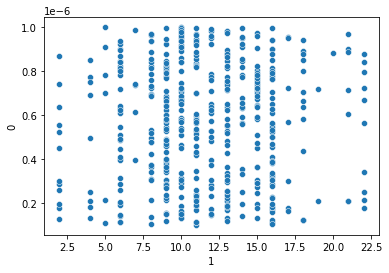

In [278]:
(pred_df-true_df)

import seaborn as sns


frames = [true_df, pred_df]


result =pd.concat([true_df,pred_df.rename(columns={'b':'a'})], ignore_index=True,axis=1)
sns.scatterplot(data=result,x=1,y=0)
 
# Show the plot
plt.show()

In [268]:
result

,0,1
0,7.142550e-07,6.295511e-07
1,2.370434e-07,3.811223e-07
2,4.270629e-07,6.295511e-07
3,6.883131e-07,6.968180e-07
4,6.706861e-07,6.968180e-07
...,...,...
495,6.255198e-07,3.461974e-07
496,7.606077e-07,6.968180e-07
497,5.798555e-07,5.805852e-07
498,5.826889e-07,5.637951e-07


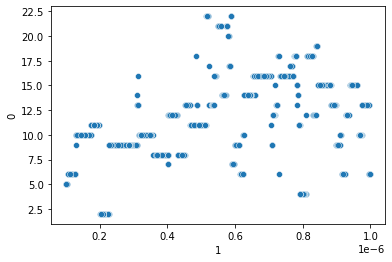

In [292]:
plt.clf()
result =pd.concat([fd,pd.DataFrame(de_normalizeTargets(train_,'train')).rename(columns={'b':'a'})], ignore_index=True,axis=1)
sns.scatterplot(data=result,x=1,y=0)
 
# Show the plot
plt.show()


In [287]:
from scipy.stats import spearmanr
rho, p = spearmanr(fd,pd.DataFrame(de_normalizeTargets(train_,'train')))


In [289]:
de_normalizeTargets(train_,'train')

array([8.64632831e-07, 4.81572218e-07, 1.96785055e-07, 3.38905014e-07,
       1.65516227e-07, 5.16716342e-07, 2.97334934e-07, 1.38864007e-07,
       4.18737371e-07, 9.04396874e-07, 2.61849330e-07, 2.14987948e-07,
       9.09989357e-07, 7.69841383e-07, 9.25662773e-07, 3.93396931e-07,
       1.29161131e-07, 7.98421572e-07, 9.55270501e-07, 8.10529217e-07,
       1.25928026e-07, 8.35141613e-07, 4.61128779e-07, 1.41971141e-07,
       7.17377096e-07, 2.12014921e-07, 6.44845424e-07, 4.80008659e-07,
       4.01444756e-07, 2.42414675e-07, 6.89191291e-07, 6.23817606e-07,
       6.21915429e-07, 4.67353741e-07, 1.24580807e-07, 8.25314292e-07,
       6.16226142e-07, 9.23452729e-07, 3.13902583e-07, 9.65940915e-07,
       4.34706118e-07, 2.20415096e-07, 4.31116700e-07, 5.25598157e-07,
       6.24659840e-07, 1.07300185e-07, 7.59562402e-07, 5.40507363e-07,
       8.09184214e-07, 4.10309254e-07, 5.55338173e-07, 1.51388096e-07,
       1.21431658e-07, 5.75249367e-07, 5.19228693e-07, 3.61676171e-07,
      

In [290]:
fd

,0
0,15
1,11
2,11
3,10
4,10
...,...
995,13
996,10
997,6
998,6


In [288]:
rho

0.4837472145722622

In [137]:
p

2.978933288631969e-69

In [139]:
from sklearn.linear_model import LinearRegression

In [140]:
mod = LinearRegression().fit(fd,target)

In [141]:
mod.score(fd,target)

0.19143694447673087

In [145]:
#pred_df =pd.DataFrame(de_normalizeTargets(mod.predict(pd.DataFrame(np.stack(vali_x,axis=1)).T),'validation'))
pred_df =pd.DataFrame(de_normalizeTargets(mod.predict(pd.DataFrame(vali_x)),'validation'))

In [146]:
pred_df

,0
0,5.556783e-07
1,4.713786e-07
2,5.556783e-07
3,6.680779e-07
4,6.680779e-07
...,...
495,4.994785e-07
496,6.680779e-07
497,7.804775e-07
498,8.085774e-07


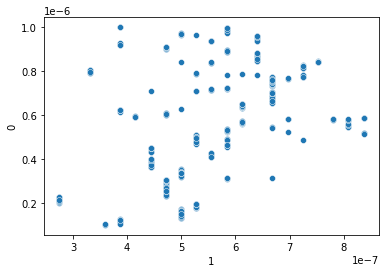

In [147]:
(pred_df-true_df)

import seaborn as sns


frames = [true_df, pred_df]


result =pd.concat([true_df,pred_df.rename(columns={'b':'a'})], ignore_index=True,axis=1)
sns.scatterplot(data=result,x=1,y=0)
 
# Show the plot
plt.show()

In [148]:
result

,0,1
0,7.142550e-07,5.556783e-07
1,2.370434e-07,4.713786e-07
2,4.270629e-07,5.556783e-07
3,6.883131e-07,6.680779e-07
4,6.706861e-07,6.680779e-07
...,...,...
495,6.255198e-07,4.994785e-07
496,7.606077e-07,6.680779e-07
497,5.798555e-07,7.804775e-07
498,5.826889e-07,8.085774e-07


In [149]:
from scipy.stats import spearmanr
rho, p = spearmanr(pred_df,true_df)


In [150]:
rho

0.4790609289400003

In [151]:
p

4.7459560896588995e-30